# Potentials

In this Notebook you can find the different Potentials, that are already implemented and can be used for your projects. Play around with the parameters to get familiar with the Potentials


Here you also can find classical Potentials like the harmonic Oscillator or the Lennard Jones Potential.

In [1]:
#if the package was not installed:
import os, sys
path = "../"
sys.path.append(path)

#Imports
##general
import numpy as np
from matplotlib import pyplot as plt

##Ensembler
from ensembler.potentials import OneD as potentials1D
from ensembler.potentials import TwoD as potentials2D

###Plotting:
import ensembler.visualisation.plotPotentials as vis

#params
test_timing_with_points =100

In [2]:
import numpy as np
from ensembler.potentials import OneD as potentials1D
import ensembler.visualisation.plotPotentials as vis

## Classics


### Harmonic Oscillator

The Harmonic Oscillator is one of the most used modelling potentials1D. Its based on hooke's law and can be used to describe obviously springs, but also covalent bonds of two atoms and many more physical relations.


Functional:

$V =  \frac{1}{2}*k*(r - r_0)^2+V_{offset} $

with:
* $k$ force constant
* $r_0$ optimal position (optimal covalent bond length)
* $r$ current position (current bond length)
* $V_{offset}$ minimal potential energy offset

first partial deviation by r

$\frac{\partial V}{\partial r} = k*(r - r_0) $



#### 1D

calculate 100 positions: 
Wall time: 0 ns

Visualization


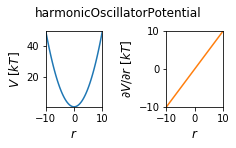

In [3]:
# 1D
positions = np.linspace(-10,10, test_timing_with_points)

V = potentials1D.harmonicOscillatorPotential()
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential(V, positions=positions)

#### 2D

calculate 100 positions: 
Wall time: 2 ms

Visualization


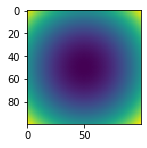

In [4]:
# 2D
positions = np.linspace(-4, 4, test_timing_with_points)
x_positions, y_positions = np.meshgrid(positions,positions)
positions2D = np.array([x_positions.flatten(), y_positions.flatten()]).T

V = potentials2D.harmonicOscillatorPotential()
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions2D)


print("\nVisualization")
plt.imshow(V.ene(positions2D).reshape([test_timing_with_points,test_timing_with_points]))

In [5]:
positions = np.linspace(-4, 4, test_timing_with_points)
x_positions, y_positions = np.meshgrid(positions,positions)
positions2D = np.array([x_positions.flatten(), y_positions.flatten()]).T

fig, axes = vis.plot_2DPotential(V, positions2D)

ValueError: cannot reshape array of size 10000 into shape (1000,1000)

In [ ]:
from numbers import Number
from typing import Tuple, List

import matplotlib
import numpy as np
from matplotlib import pyplot as plt, colorbar

import ensembler.potentials.TwoD as pot2D
from ensembler.potentials import OneD as pot
from ensembler.potentials._basicPotentials import _potential1DCls, _potential1DClsPerturbed

from ensembler.visualisation import plot_layout_settings
from ensembler.visualisation import style

for key, value in plot_layout_settings.items():
    matplotlib.rcParams[key] = value

    
def plot_2DPotential(V: pot2D._potential2DCls, positions2D: List[Tuple[Number, Number]] = None, title: str = None,
                     x_label: str = None, y_label: str = None, space_range: Tuple[Number, Number] = (-10, 10),
                     point_resolution: int = 1000, ax=None, show_plot: bool = False, dpi: int = 300,
                     cmap=style.qualitative_map) -> (
        plt.Figure, plt.Axes, np.array):
    # build positions
    if (isinstance(positions2D, type(None))):
        minX, maxX = min(space_range), max(space_range)
        minY, maxY = min(space_range), max(space_range)
        
        positions = np.linspace(min(space_range), max(space_range), point_resolution)
        x_positions, y_positions = np.meshgrid(positions, positions)
        positions2D = np.array([x_positions.flatten(), y_positions.flatten()]).T
    else:
        positions2D = np.array(positions2D)
        minX, maxX = min(positions2D[:, 0]), max(positions2D[:, 0])
        minY, maxY = min(positions2D[:, 1]), max(positions2D[:, 1])

        # landscapes
    V_pots = V.ene(positions2D)
    
    minV, maxV = np.min(V_pots), np.max(V_pots)

    V_land = V_pots.reshape([point_resolution, point_resolution])

    # make Figure
    if (isinstance(ax, type(None))):
        fig, ax = plt.subplots(ncols=1, dpi=dpi)
    else:
        fig = None

    surf = ax.imshow(V_land, cmap=cmap, extent=[minX, maxX, minY, maxY])
    ax.set_ylim([minY, maxY])
    ax.set_xlim([minX, maxX])
    
    if (isinstance(x_label, type(None))):
        ax.set_xlabel("x")
    else:
        ax.set_xlabel(x_label)

    if (isinstance(y_label, type(None))):
        ax.set_ylabel("y")
    else:
        ax.set_ylabel(y_label)

    ax.set_xticks(np.linspace(minX, maxX + 1, 3))
    ax.set_yticks(np.linspace(minY, maxY + 1, 3))

    if (isinstance(title, type(None))):
        ax.set_title("Potential Landscape")
    else:
        ax.set_title(title)

    # color bar:
    if (not isinstance(fig, type(None))):
        cbaxes = fig.add_axes([0.9, 0.1, 0.03, 0.8])
        cb = plt.colorbar(surf, fraction=0.046, pad=0.04, cax=cbaxes,
                          ticks=list(np.round(np.linspace(minV, maxV, 5), 2)))
        cb.set_label("V/[kT]")

        fig.tight_layout()

        if (show_plot):
            fig.show()

    return fig, ax, surf


In [ ]:
positions = np.linspace(-4, 4, test_timing_with_points)
x_positions, y_positions = np.meshgrid(positions,positions)
positions2D = np.array([x_positions.flatten(), y_positions.flatten()]).T

plot_2DPotential(V, positions2D )

### Double Well Potential
The double well is a very nice potential.

Functional:

$V = \frac{V_{max}}{b^4}*((-\frac{a}{2} + r)^2-b^2)^2$


first order derivative

$\frac{\partial V}{\partial r} = \frac{V_max}{b^4}*(-2a + 4r)*((-a/2 + r)^2-b^2) $

In [ ]:
positions = np.linspace(-3, 3, test_timing_with_points)

V = potentials1D.doubleWellPotential(a=0, b=1, Vmax=5)
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential(V, positions=positions, y_range=[-50,50])

pass

### Four Well Potential

In [ ]:
#phase space
positions = np.linspace(0, 10, test_timing_with_points)

#build potential
V = potentials1D.fourWellPotential(a=1,b=4, c=6, d=8)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization") #visualize
fig, axes = vis.plot_1DPotential(V, positions=positions)
#fig.savefig("four_well.png")

pass

### Wave Potential

Functional:

$A*cos(m*(r + w)) + V_{off}$

first derivative:

$\frac{\partial V}{\partial r} = -A*m*sin(m*(r + w)) $

In [ ]:
#1D
positions = np.linspace(0, 4, test_timing_with_points)

V = potentials1D.wavePotential()
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential(V, positions=positions)

In [ ]:
#2D
positions = np.linspace(-180, 180, test_timing_with_points)
x_positions, y_positions = np.meshgrid(positions,positions)
positions2D = np.array([x_positions.flatten(), y_positions.flatten()]).T

V = potentials2D.wavePotential(multiplicity=[2,2], radians=False)
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions2D)


print("\nVisualization")
plt.imshow(V.ene(positions2D).reshape([test_timing_with_points,test_timing_with_points]))

### Torsion Potential

In [ ]:
positions = np.linspace(-4, 4, test_timing_with_points)

w1 = potentials1D.wavePotential(multiplicity=3)
w2 = potentials1D.wavePotential()
waves = [w1, w2]

V = potentials1D.torsionPotential(wavePotentials=waves)
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential(V, positions=positions)


### Lennard Jones Potential

Functional:

$V = 4e*(\frac{s^{12}}{(r - r_0)^12} - \frac{s^6}{(r - r_0)^6}) +  V_{off}$

first derivative:

$\frac{\partial V}{\partial r} = 4e*(-12*\frac{s^{12}}{(r - r_0)^13} + 6*\frac{s^6}{(r - r_0)^7})$


In [ ]:
positions = np.linspace(-5, 5, test_timing_with_points)

V = potentials1D.lennardJonesPotential()
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, _ = vis.plot_1DPotential(V, positions=positions, y_range=[-5,5])
pass

### Culomb Potential


Functional:

$V = \frac{q_1q_2}{(4 \pi \epsilon r)}$

first derivative:

$\frac{\partial V}{\partial r} = \frac{-q_1q_2}{(4\pi \epsilon r^2)}$



In [ ]:
positions = np.linspace(-1, 5, test_timing_with_points)

V = potentials1D.coulombPotential()
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential(V, positions=positions)

## Perturbed/MultiState Potentials

### linear coupled

Functional:

$V(r, \lambda) = \lambda V_a(r) + (1-\lambda) V_b(r)$


first order derivatives:


$\frac{\partial V}{\partial \lambda} = $

$\frac{\partial V}{\partial r} = $


In [ ]:
positions = np.linspace(-4, 4, test_timing_with_points)

w1 = potentials1D.harmonicOscillatorPotential()
w2 = potentials1D.harmonicOscillatorPotential(k=11)

V = potentials1D.linearCoupledPotentials(Va=w1, Vb=w2)
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential(V, positions=positions)


In [ ]:
positions = np.linspace(-4, 4, test_timing_with_points)

w1 = potentials1D.harmonicOscillatorPotential(k=10, x_shift=-2)
w2 = potentials1D.harmonicOscillatorPotential(k=10, x_shift=2)


w1 = potentials1D.harmonicOscillatorPotential(k=12, x_shift=-2)
w2 = potentials1D.harmonicOscillatorPotential(k=12, x_shift=2)
V = potentials1D.linearCoupledPotentials(Va=w1, Vb=w2)

lambda_ene = []
for lam in np.arange(0, 1, 0.01):
    V.lam = lam
    lambda_ene.append(V.ene(positions))

print("\nVisualization")
fig, ax = plt.subplots(ncols=1, figsize=[10,10])
mapping = ax.imshow(lambda_ene, extent=[0,100, 0,100], vmin=0, vmax=50)
opt_labels = np.array(ax.get_yticks())/100
ax.set_yticklabels(opt_labels)
opt_labels = np.round(((np.array(ax.get_yticks())/100)*8)-4,2)
ax.set_xticklabels(opt_labels)

ax.set_ylabel("lambda")
ax.set_xlabel("r")
cm = plt.colorbar(mapping)
cm.set_label("V")
fig.tight_layout()


### exponential Copuled - Enveloping Potential


Used in EDS

Functional:

$V(r) = -\frac{1}{k_b T s} ln(e^{- k_b T s (V_i-E^{off}_i)}+e^{-k_b T s (V_j-E^{off}_j)})$



In [ ]:
positions = np.linspace(-4, 4, test_timing_with_points*10000)

w1 = potentials1D.harmonicOscillatorPotential(x_shift=-2)
w2 = potentials1D.harmonicOscillatorPotential(x_shift=2)

#print(w1, w2)
V = potentials1D.exponentialCoupledPotentials(Va=w1, Vb=w2, s=1, eoffA=0, eoffB=0)
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential(V, positions=positions)
plt.show()
plt.close()
plt.plot(positions, V.ene(positions))
plt.plot(positions, w1.ene(positions))
plt.plot(positions, w2.ene(positions))


plt.ylim([0,2])


### linear & exponential hybrid Copuled - $\lambda$ EDS

Functional:

$V(r) = -\frac{1}{k_b T s} ln(\lambda e^{- k_b T s (V_i-E^{off}_i)}+(1-\lambda)e^{-k_b T s (V_j-E^{off}_j)})$



In [ ]:
positions = np.linspace(-4, 4, test_timing_with_points)

w1 = potentials1D.harmonicOscillatorPotential(x_shift=-2)
w2 = potentials1D.harmonicOscillatorPotential(x_shift=2)

V = potentials1D.hybridCoupledPotentials(Va=w1, Vb=w2, lam=0)
#print(V)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential(V, positions=positions)

#perturbed potentilas


In [ ]:
positions = np.linspace(-4, 4, test_timing_with_points)

w1 = potentials1D.harmonicOscillatorPotential(k=12, x_shift=-2)
w2 = potentials1D.harmonicOscillatorPotential(k=12, x_shift=2)
V = potentials1D.hybridCoupledPotentials(Va=w1, Vb=w2, s=0.1)

#ha=harmonicOsc(fc=1.0, x_shift=0.0), hb=harmonicOsc(fc=3.0, x_shift=10.0), s=0.05, temp=300.0

lambda_ene = []
for lam in np.arange(0, 1.01, 0.01):
    V.lam = lam
    lambda_ene.append(V.ene(positions))

print("\nVisualization")
fig, ax = plt.subplots(ncols=1, figsize=[10,10])
mapping = ax.imshow(lambda_ene, extent=[0,100, 0,100], vmin=0, vmax=10)
opt_labels = np.array(ax.get_yticks())/100
ax.set_yticklabels(opt_labels)
opt_labels = np.round(((np.array(ax.get_yticks())/100)*8)-4,2)
ax.set_xticklabels(opt_labels)

ax.set_ylabel("lambda")
ax.set_xlabel("r")
cm = plt.colorbar(mapping)
cm.set_label("V")
fig.tight_layout()


In [ ]:
positions = np.linspace(-4, 4, test_timing_with_points)

w1 = potentials1D.harmonicOscillatorPotential(k=12, x_shift=-2)
w2 = potentials1D.harmonicOscillatorPotential(k=12, x_shift=2)
V = potentials1D.hybridCoupledPotentials(Va=w1, Vb=w2, s=0.1)


points=50
lambda_ene = []
for lam, s in zip(np.linspace(0, 0.5, points), np.logspace(0, -3,  points)):
    V.lam = lam
    V.s=s
    lambda_ene.append(V.ene(positions))
for lam, s in zip(np.linspace(0.51, 1,  points), np.logspace(-3, 0,  points)):
    V.lam = lam
    V.s=s
    lambda_ene.append(V.ene(positions))

print("\nVisualization")
fig, ax = plt.subplots(ncols=1, figsize=[10,10])
mapping = ax.imshow(lambda_ene, extent=[0,100, 0,100], vmin=0, vmax=30)
opt_labels = np.array(ax.get_yticks())/100
ax.set_yticklabels(opt_labels)
opt_labels = np.round(((np.array(ax.get_yticks())/100)*8)-4,2)
ax.set_xticklabels(opt_labels)

ax.set_ylabel("lambda")
ax.set_xlabel("r")
cm = plt.colorbar(mapping)
cm.set_label("V")
fig.tight_layout()


## Special Potentials

The Gerhard Koenich speciality corner. Here we have some special potential for very special usecases.

### dummy Potential

This potential returns always the same value independt on its position.



In [ ]:
positions = np.linspace(1,100, test_timing_with_points)

V = potentials1D.dummyPotential()

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, axes = vis.plot_1DPotential(V, positions=positions)

### Flatwell Potential

A potential return dependent on a position a value in a binary fashion


In [ ]:
positions = np.linspace(-10,10, test_timing_with_points)

V = potentials1D.flatwellPotential(y_min=0)

print("calculate "+str(len(positions))+" positions: ")
%time V.ene(positions)

print("\nVisualization")
fig, _ = vis.plot_1DPotential(V, positions=positions, y_range=[-5,5])